In [113]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Path to dataset files: /Users/a.t.yaswanthreddy/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [114]:
import pandas as pd

import os

csv_file = os.path.join(path, "insurance.csv")
df = pd.read_csv(csv_file)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='smoker', ylabel='charges'>

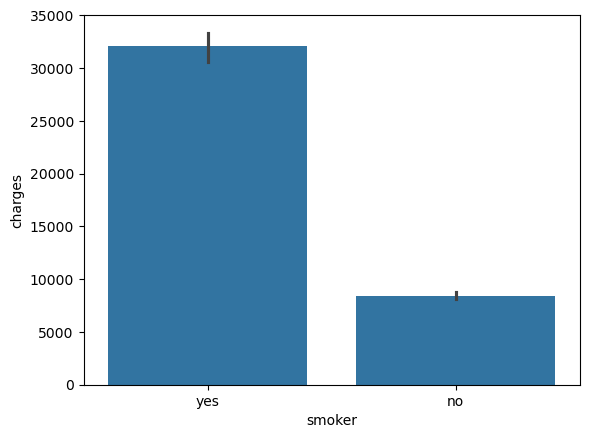

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(df, x="smoker", y="charges")

Smokers are prone to higher medical bills.

<Axes: xlabel='region', ylabel='charges'>

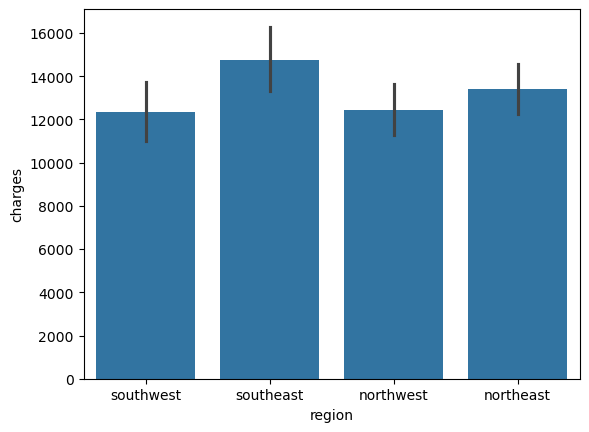

In [116]:
sns.barplot(df, x="region", y="charges")

Overall there isnt much of a difference between the regions.

<Axes: xlabel='children', ylabel='charges'>

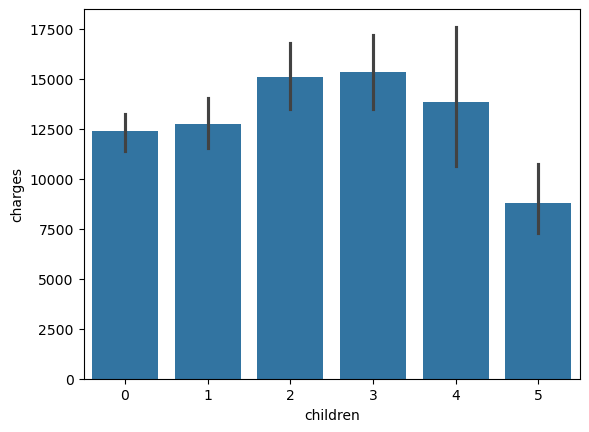

In [117]:
sns.barplot(df, x="children", y="charges")

<Axes: xlabel='age', ylabel='charges'>

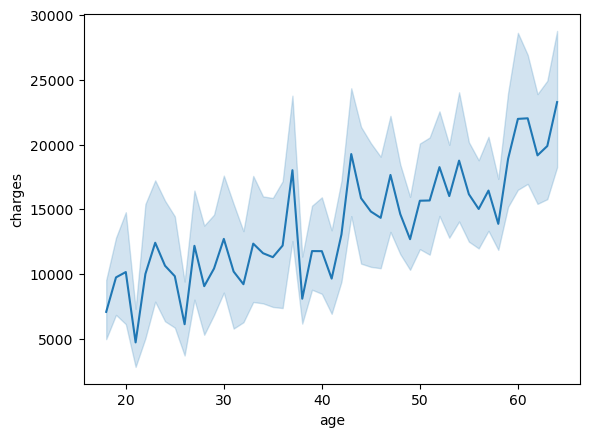

In [118]:
sns.lineplot(df, x="age", y="charges")

People who are old seem to spend more on medical bills.

<Axes: xlabel='sex', ylabel='charges'>

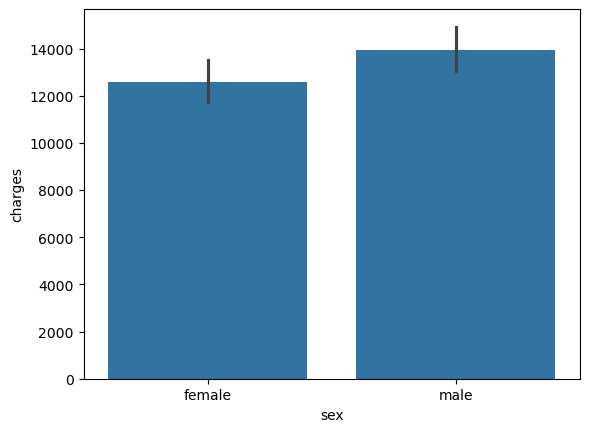

In [119]:
sns.barplot(df, x="sex", y="charges")

<Axes: xlabel='bmi', ylabel='charges'>

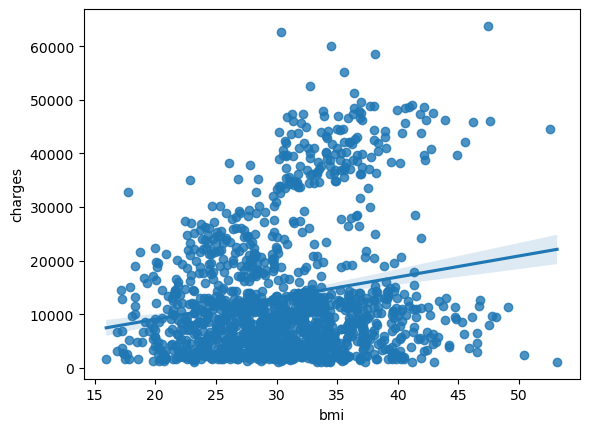

In [120]:
sns.regplot(df, x="bmi", y="charges")

<Axes: xlabel='children', ylabel='Density'>

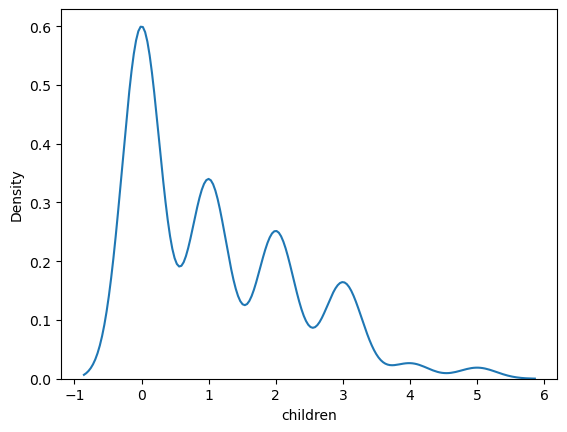

In [121]:
sns.kdeplot(df, x="children")

<Axes: xlabel='children', ylabel='Density'>

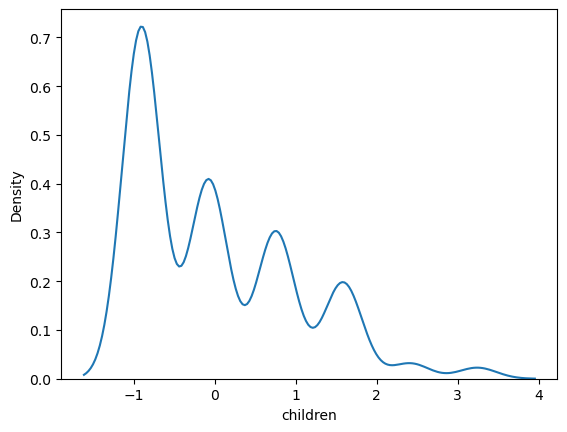

In [122]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df['children'] = standard_scaler.fit_transform(df[['children']])
sns.kdeplot(df, x="children")

In [123]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

encoded_values = encoder.fit_transform(df[["sex", "region"]])
encoded_df = pd.DataFrame(encoded_values.toarray(), columns=encoder.get_feature_names_out(), index=df.index)

df = df.drop(columns=["sex", "region"])
df = pd.concat([df, encoded_df], axis=1)

In [124]:
df["smoker"] = df["smoker"].map({"yes": 0, "no": 1})
df.head()

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,-0.908614,0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,-0.078767,1,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,33.000,1.580926,1,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,-0.908614,1,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,-0.908614,1,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0


In [125]:
from sklearn.model_selection import train_test_split

X = df[[col for col in df.columns if col!= "charges"]]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 8)

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

randome_forrest = RandomForestRegressor(random_state=8)

randome_forrest.fit(X_train, y_train)

y_pred = randome_forrest.predict(X_test)

print(root_mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))

4537.685240127184 0.8527084241121143


In [127]:
forest_features = pd.Series(randome_forrest.feature_importances_, index=X.columns)
forest_features.sort_values(ascending=False)

smoker              0.628994
bmi                 0.193682
age                 0.127880
children            0.022433
region_northeast    0.006125
region_northwest    0.005341
region_southeast    0.004763
sex_female          0.003709
sex_male            0.003550
region_southwest    0.003523
dtype: float64

In [128]:
selected_features = forest_features.head(3)
selected_features

age         0.127880
bmi         0.193682
children    0.022433
dtype: float64

In [130]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred),"MSE Score: ",  root_mean_squared_error(y_test, y_pred))

R2 score:  0.75699069010313 MSE Score:  5828.500916757703


The above is linear regression with all the features

## Below are the models created using only the top 3 features.

In [131]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X = df[selected_features.index]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 8)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred),"MSE Score: ",  root_mean_squared_error(y_test, y_pred))

R2 score:  0.1562418187993303 MSE Score:  10860.614822417521


In [132]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

X = df[selected_features.index]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 8)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred),"MSE Score: ",  root_mean_squared_error(y_test, y_pred))

R2 score:  -0.9775513253229808 MSE Score:  16626.823823181996


In [133]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X = df[selected_features.index]
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 8)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred),"MSE Score: ",  root_mean_squared_error(y_test, y_pred))

R2 score:  -0.17177201899102879 MSE Score:  12798.732867281706
